# **CoE202 Final Project Guideline - Yut AI**



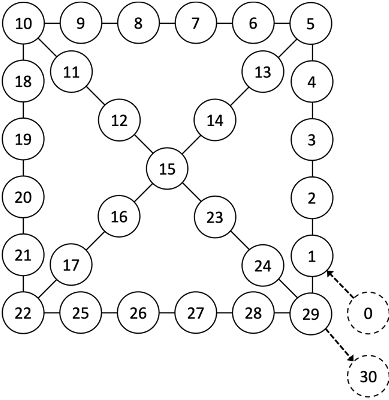

# 0. Game rules
* See https://en.wikipedia.org/wiki/Yut for the basic rules of yut.
* There are six possible yut score values: 1 ('do', 11.52%), 2 ('gae', 34.56%), 3 ('geol', 34.56%), 4 ('yut', 12.96%), 5 ('mo', 2.56%), and -1 ('backdo', 3.84%).
* Initially all mals are located at position 0. You the game when all your mals arrive position 30.
* When moving a mal at position 5, 10, or 15, you have to move through the shortcut (to position 13, 11, or 23, respectively).
* If you have used 'yut' or 'mo' to catch the opponent's mal, you do NOT gain a chance to cast yuts one more time.
* Once two or more mals get located at the same position, these mals have to move together until all they die or finish the run.
* If you try to move a mal at position 30, it is considered as an illegal move and you lose immediately.

> Backdo rules:
* If there is no running mal (i.e., all mals are at position 0 or 30), you can skip 'backdo'.
* You can move a mal at position 1 to position 29 using 'backdo'.
* When moving a mal at psoition 5, 22, or 29 using 'backdo', you can decide whether to move back through the shortcut or not.
* If you try to move a mal at position 0 using 'backdo' when there is a running mal, it is considered as an illegal move and you lose immediately.

Please **upload `yut` folder** (containing `engine.py` and `rule.py`) to Colab environment in order to proceed.

# 1. Basics
The module `yut.engine` provides basic tools to simulate yut game:

In [27]:
import yut.engine

The following `RandomPlayer` class implements a strategy that randomly moves a mal.

*   A strategy must inherit `yut.engine.Player` class
*   A strategy must support `action()` method. It takes an input argument `state` that is a 4-tuple `(turn, my_positions, enemy_positions, available_yutscores)`, and returns a 4-tuple `(mal_to_move, yutscore_to_use, shortcut, debug_msg)`. See Section 4 for the detail.
*   This `RandomPlayer` strategy moves one random mal (one among `available_mals`) using one random yut score (one among `available_yutscores`) and always tries to use a short cut.



In [28]:
import numpy as np
class RandomPlayer(yut.engine.Player):
	def name(self):
		return "Random"

	def action(self, state):
		turn, my_positions, enemy_positions, available_yutscores = state
		yutscore_to_use = np.random.choice( available_yutscores )
		available_mals = []
		if yutscore_to_use == -1:
			available_mals = [ mal_index for mal_index,mal_position in enumerate(my_positions) if mal_position != yut.rule.FINISHED and mal_position != 0 ]
		if len(available_mals) == 0:
			available_mals = [ mal_index for mal_index,mal_position in enumerate(my_positions) if mal_position != yut.rule.FINISHED ]
		mal_to_move = np.random.choice( available_mals )
		shortcut = True
		debug_msg = ""

		return mal_to_move, yutscore_to_use, shortcut, debug_msg

The following code runs a single game play between `RandomPlayer` vs `RandomPlayer`.
* `yut.engine.GameEngine.play()` is the function that simulates the game. It takes two `Player` objects, a random seed value (optional), and an event listener object (optional, described in Section 2). It returns 0 if the first player won, and 1 if the second player won.

In [45]:
# create a game engine
engine = yut.engine.GameEngine()

# create two game players
player1 = RandomPlayer()
player2 = RandomPlayer()

# simulate a game between two players with a given random seed
for random_seed in range(100):
	winner = engine.play( player1, player2, seed=random_seed )
	if winner == 0:
		print( "Player 1 won!" )
	else:
		print( "Player 2 won!" )

Player 1 won!
Player 1 won!
Player 1 won!
Player 2 won!
Player 1 won!
Player 1 won!
Player 1 won!
Player 2 won!
Player 1 won!
Player 1 won!
Player 2 won!
Player 1 won!
Player 2 won!
Player 1 won!
Player 1 won!
Player 2 won!
Player 1 won!
Player 1 won!
Player 1 won!
Player 1 won!
Player 2 won!
Player 2 won!
Player 1 won!
Player 1 won!
Player 1 won!
Player 1 won!
Player 1 won!
Player 1 won!
Player 1 won!
Player 2 won!
Player 2 won!
Player 2 won!
Player 1 won!
Player 1 won!
Player 2 won!
Player 2 won!
Player 2 won!
Player 2 won!
Player 1 won!
Player 1 won!
Player 1 won!
Player 2 won!
Player 2 won!
Player 1 won!
Player 1 won!
Player 2 won!
Player 2 won!
Player 2 won!
Player 1 won!
Player 2 won!
Player 2 won!
Player 2 won!
Player 2 won!
Player 2 won!
Player 2 won!
Player 2 won!
Player 1 won!
Player 2 won!
Player 2 won!
Player 2 won!
Player 2 won!
Player 2 won!
Player 1 won!
Player 2 won!
Player 1 won!
Player 1 won!
Player 2 won!
Player 1 won!
Player 2 won!
Player 1 won!
Player 2 won!
Player

# 2. Game Event Listner
You may wonder what happend during the game. The game event listener can help you see, save, and replay the game states over the course of game play.

## 2-1. Printing out game history
In order to simply print out the game events onto your screen (streaming), you can simply create `yut.engine.EventPrinter` object and pass it through `game_event_listener` argument when calling `yut.engine.GameEngine.play()`.



In [30]:
event_printer = yut.engine.EventPrinter()
engine.play( player1, player2, seed=random_seed, game_event_listener=event_printer )

Turn #0: Player 1 (Random)'s turn
	cast outcome = [3]: geol
	available yut scores = [3]: geol
	action = (1, 3, True): move mal 1 using 'geol' with shortcut
	result:
[10:    ] [ 9:    ] [ 8:    ]           [ 7:    ] [ 6:    ] [ 5:    ] 
[18:    ] [11:    ]                               [13:    ] [ 4:    ] 
[19:    ]           [12:    ]           [14:    ]           [ 3:b   ] 
                              [15:    ]                               
[20:    ]           [16:    ]           [23:    ]           [ 2:    ] 
[21:    ] [17:    ]                               [24:    ] [ 1:    ] Player 1=(0, 3, 0, 0)
[22:    ] [25:    ] [26:    ]           [27:    ] [28:    ] [29:    ] Player 2=(0, 0, 0, 0)

Turn #1: Player 2 (Random)'s turn
	cast outcome = [3]: geol
	available yut scores = [3]: geol
	action = (3, 3, True): move mal 3 using 'geol' with shortcut
	result:
[10:    ] [ 9:    ] [ 8:    ]           [ 7:    ] [ 6:    ] [ 5:    ] 
[18:    ] [11:    ]                               [13:    ]

1

## 2-2. Save, load & replay
You may want to archive the game history into a file and review it later. `yut.engine.EventLogger` can help you this time: create a `yut.engine.EventLogger()` object and pass it through `game_event_listener` argument.

In [31]:
event_logger = yut.engine.EventLogger()
engine.play( player1, player2, seed=random_seed, game_event_listener=event_logger )

1

All game history should be stored in the event logger object.
You can call `print()` on this object if you want to print out the game history (as if you're using `yut.engine.EventPrinter`).

In [32]:
event_logger.print()

Turn #0: Player 1 (Random)'s turn
	cast outcome = [3]: geol
	available yut scores = [3]: geol
	action = (1, 3, True): move mal 1 using 'geol' with shortcut
	result:
[10:    ] [ 9:    ] [ 8:    ]           [ 7:    ] [ 6:    ] [ 5:    ] 
[18:    ] [11:    ]                               [13:    ] [ 4:    ] 
[19:    ]           [12:    ]           [14:    ]           [ 3:b   ] 
                              [15:    ]                               
[20:    ]           [16:    ]           [23:    ]           [ 2:    ] 
[21:    ] [17:    ]                               [24:    ] [ 1:    ] Player 1=(0, 3, 0, 0)
[22:    ] [25:    ] [26:    ]           [27:    ] [28:    ] [29:    ] Player 2=(0, 0, 0, 0)

Turn #1: Player 2 (Random)'s turn
	cast outcome = [3]: geol
	available yut scores = [3]: geol
	action = (3, 3, True): move mal 3 using 'geol' with shortcut
	result:
[10:    ] [ 9:    ] [ 8:    ]           [ 7:    ] [ 6:    ] [ 5:    ] 
[18:    ] [11:    ]                               [13:    ]

You can save the game history into a file using `save()`. This function internally uses `pickle` module, and may not be compatible across different python environments.

In [33]:
event_logger.save( "game.log" )

In order to load the game history file, you should create an event logger object and call `load()`.

In [34]:
test = yut.engine.EventLogger()
test.load( "game.log" )
test.print()

Turn #0: Player 1 (Random)'s turn
	cast outcome = [3]: geol
	available yut scores = [3]: geol
	action = (1, 3, True): move mal 1 using 'geol' with shortcut
	result:
[10:    ] [ 9:    ] [ 8:    ]           [ 7:    ] [ 6:    ] [ 5:    ] 
[18:    ] [11:    ]                               [13:    ] [ 4:    ] 
[19:    ]           [12:    ]           [14:    ]           [ 3:b   ] 
                              [15:    ]                               
[20:    ]           [16:    ]           [23:    ]           [ 2:    ] 
[21:    ] [17:    ]                               [24:    ] [ 1:    ] Player 1=(0, 3, 0, 0)
[22:    ] [25:    ] [26:    ]           [27:    ] [28:    ] [29:    ] Player 2=(0, 0, 0, 0)

Turn #1: Player 2 (Random)'s turn
	cast outcome = [3]: geol
	available yut scores = [3]: geol
	action = (3, 3, True): move mal 3 using 'geol' with shortcut
	result:
[10:    ] [ 9:    ] [ 8:    ]           [ 7:    ] [ 6:    ] [ 5:    ] 
[18:    ] [11:    ]                               [13:    ]


In addition to just priting out the game history, you can also directly access the game result or the game events as follows:



In [35]:
print( "winner =", event_logger.winner )
print( "# of events =", len( event_logger.events ) )
print( "1st event =", event_logger.events[0] )

winner = 1
# of events = 76
1st event = (0, [3], (0, (0, 0, 0, 0), (0, 0, 0, 0), [3]), (1, 3, True, ''), (True, (0, 3, 0, 0), (0, 0, 0, 0), 0))


Regarding the varaible `events`,
*   One event per action
*   One event is encoded with a 5-tuple `(turn, cast_outcome, state, action, result)`.
Here, `turn` is an interger value representing the
turn number, `cast_outcome` is a list of yut scores representing the outcome of recent yut cast, `state` is the state variable given to the current player's `action()` function, `action` is the action variable returned by the current player's `action()` function, and `result` is the result of the move returned by `yut.rule.make_move()` (see Section 3 for detail).

## 2-2. Building your own event listener

If you want, you can implement your own event listener and pass through `game_event_listener` argument, as long as it has the following structure. The function names should be self-explanatory.

In [36]:
class CustomEventListener:
	def on_game_start(self, name1, name2):
		pass

	def on_turn_begin(self, turn):
		pass

	def on_yut_cast(self, cast_outcome):
		pass

	def on_state(self, state):
		pass

	def on_action(self, action, result):
		pass

	def on_game_end(self, winner):
		pass

# 3. Helper Functions

The `yut.rule` module supports some helper functions regarding the game rules.

In [37]:
import yut.rule

**`yut.rule.next_position()`** returns the next mal position given the current mal position and the yut score. For example, the following code tells us that a mal at position 0 will be placed at position 3 when moving with yut score 3 ('geol') (and taking a shortcut if possible).

In [38]:
yut.rule.next_position( 0, 3, True )

3

**`yut.rule.make_move()`** returns the result of an action (move) in a specific situation:

*   It takes five arguments: `my_positions`, `enemy_positions`, `mal_to_move`, `yutscore`, `shortcut`. `my_positions` and `enemy_positions` are 4-tuples representing the current mal positions, `mal_to_move`, `yutscore`, `shortcut` are the action variables (the first three return values of `yut.engine.Player.action()`)
*   It returns 4-tuple `(legal_move, my_positions, enemy_positions, num_mals_caught)`. `legal_move` indicates whether the move is legal or not, `my_positions` and `enemy_positions` are 4-tuples representing the mal positions after the move, and `num_mals_caught` represent the number of mals killed by the move.




In [39]:
yut.rule.make_move( (0,0,0,0), (0,0,0,0), 0, 1, True )

(True, (1, 0, 0, 0), (0, 0, 0, 0), 0)

`yut.rule.random_cast()` simulates a random yut cast. It repeats casting until the outcome is not 'yut' or 'mo', and returns a list of yut scores.

In [40]:
for i in range(10):
  print( yut.rule.random_cast() )

[-1]
[2]
[3]
[1]
[3]
[-1]
[3]
[4, 2]
[2]
[2]


`yut.rule.enumerate_all_cast_outcomes()` enumerates all possible outcomes with corresponding probabilities given the maximum number of yut throwing.

In [41]:
outcomes, probs = yut.rule.enumerate_all_cast_outcomes(depth=2)
print( outcomes )
print( probs )

[[1], [2], [3], [4, 1], [4, 2], [4, 3], [4, 4], [4, 5], [4, -1], [5, 1], [5, 2], [5, 3], [5, 4], [5, 5], [5, -1], [-1]]
[0.11519999999999997, 0.3456, 0.3456000000000001, 0.014929919999999996, 0.04478976, 0.044789760000000005, 0.016796159999999997, 0.003317759999999999, 0.004976639999999998, 0.0029491199999999987, 0.008847359999999999, 0.00884736, 0.003317759999999999, 0.0006553599999999997, 0.0009830399999999995, 0.03839999999999999]


`yut.rule.print_board_positions()` provides a basic visualization of the game state.

In [42]:
yut.rule.print_board_positions( (0,1,2,3), (4,5,6,7) )

[10:    ] [ 9:    ] [ 8:    ]           [ 7:D   ] [ 6:C   ] [ 5:B   ] 
[18:    ] [11:    ]                               [13:    ] [ 4:A   ] 
[19:    ]           [12:    ]           [14:    ]           [ 3:d   ] 
                              [15:    ]                               
[20:    ]           [16:    ]           [23:    ]           [ 2:c   ] 
[21:    ] [17:    ]                               [24:    ] [ 1:b   ] Player 1=(0, 1, 2, 3)
[22:    ] [25:    ] [26:    ]           [27:    ] [28:    ] [29:    ] Player 2=(4, 5, 6, 7)


`yut.rule.print_board_custom()` helps your own visualization of the game state. For example, the following code shows how to print 2 x position value at each position.

In [43]:
yut.rule.print_board_custom(annotation = lambda position:2*position, blank=3)

[10:20 ] [ 9:18 ] [ 8:16 ]          [ 7:14 ] [ 6:12 ] [ 5:10 ] 
[18:36 ] [11:22 ]                            [13:26 ] [ 4:8  ] 
[19:38 ]          [12:24 ]          [14:28 ]          [ 3:6  ] 
                           [15:30 ]                            
[20:40 ]          [16:32 ]          [23:46 ]          [ 2:4  ] 
[21:42 ] [17:34 ]                            [24:48 ] [ 1:2  ] 
[22:44 ] [25:50 ] [26:52 ]          [27:54 ] [28:56 ] [29:58 ] 


# 4. Implementing Your Own Algorithm

As illustrated in Section 1, you can implement your own strategy by inheriting `yut.engine.Player` class. It is expected to have the following structure:

In [44]:
class MyAlgo(yut.engine.Player):
	def name(self):
		return "MyAlgoName"

	def reset(self, random_state):
		pass

	def action(self, state):
		turn, my_positions, enemy_positions, available_yutscores = state
		return mal_to_move, yutscore_to_use, shortcut, debug_msg

	def on_my_action(self, state, my_action, result):
		pass

	def on_enemy_action(self, state, enemy_action, result):
		pass

First of all, your algorithm must override **`action()`**. It should take the state variable `(turn, my_positions, enemy_positions, available_yutscores)`, and returns the action variable `(mal_to_move, yutscore_to_use, shortcut, debug_msg)`.

Regarding the state variable,
*   `turn` is an integer representing the current turn value.
*   `my_positions` is a 4-tuple representing the current mal positions of the player who is making the decision.
*   `enemy_positions` is a 4-tuple representing the current mal positions of the opponent.
*  `available_yutscores` is a list of yut score values that is avaible to the player.

Regarding the action variable,
*   `mal_to_move` is an integer representing the mal index to move. It should be either 0,1,2, or 3 and the selected mal should not be the one who already finished running.
*   `yutscore_to_use` is the yut score value to use when moving the mal. It should be one of the elements in `available_yutscores`.
*   `shortcut` is a binary value indicating whether to use shortcut if possible.
*  `debug_msg` is a text value that may help you debugging. Not necessary for the game play.




You should also override **`name()`** function in order to display your algorithm with its own name.

**`reset(random_state)`** function will be called at the beginning of each game play. Your algorithm is expected to perform a proper initialization. You can optinally use `random_state` if you want to control random number generations within your algorithm.

**`on_my_action()`** and **`on_enemy_action()`** are optional, which can be helpful for debugging. In principle, you should be able to trace every detail using event logger introduced in Section 2, but these functions allow you to debug your code in a more interactive way.
When you override these functions, they will be called by `yut.engine.GameEngine()` over the course of game play and your algorithm will get notified.
*   `on_my_action()` is called whenever your algorithm makes a move. 3 arguments will be given: the state variable `state`, the action variable `my_action`, and the move result `result`.
*   `on_enemy_action()` is called whevever your opponents makes a move. 3 arguments will be given: the state variable `state`, the action variable `enemy_action`, and the move result `result`.